# 옵티컬 플로우
#### 
### 옵티컬 플로우 : 연속하는 두 프레임(영상)에서 카메라 또는 객체의 움직임에 의해 나타나는 객체의 이동정보 패턴
#### 
### 옵티컬플로우 활용 분야 : structure from motion, video compression, video stabilization, etc
#### 
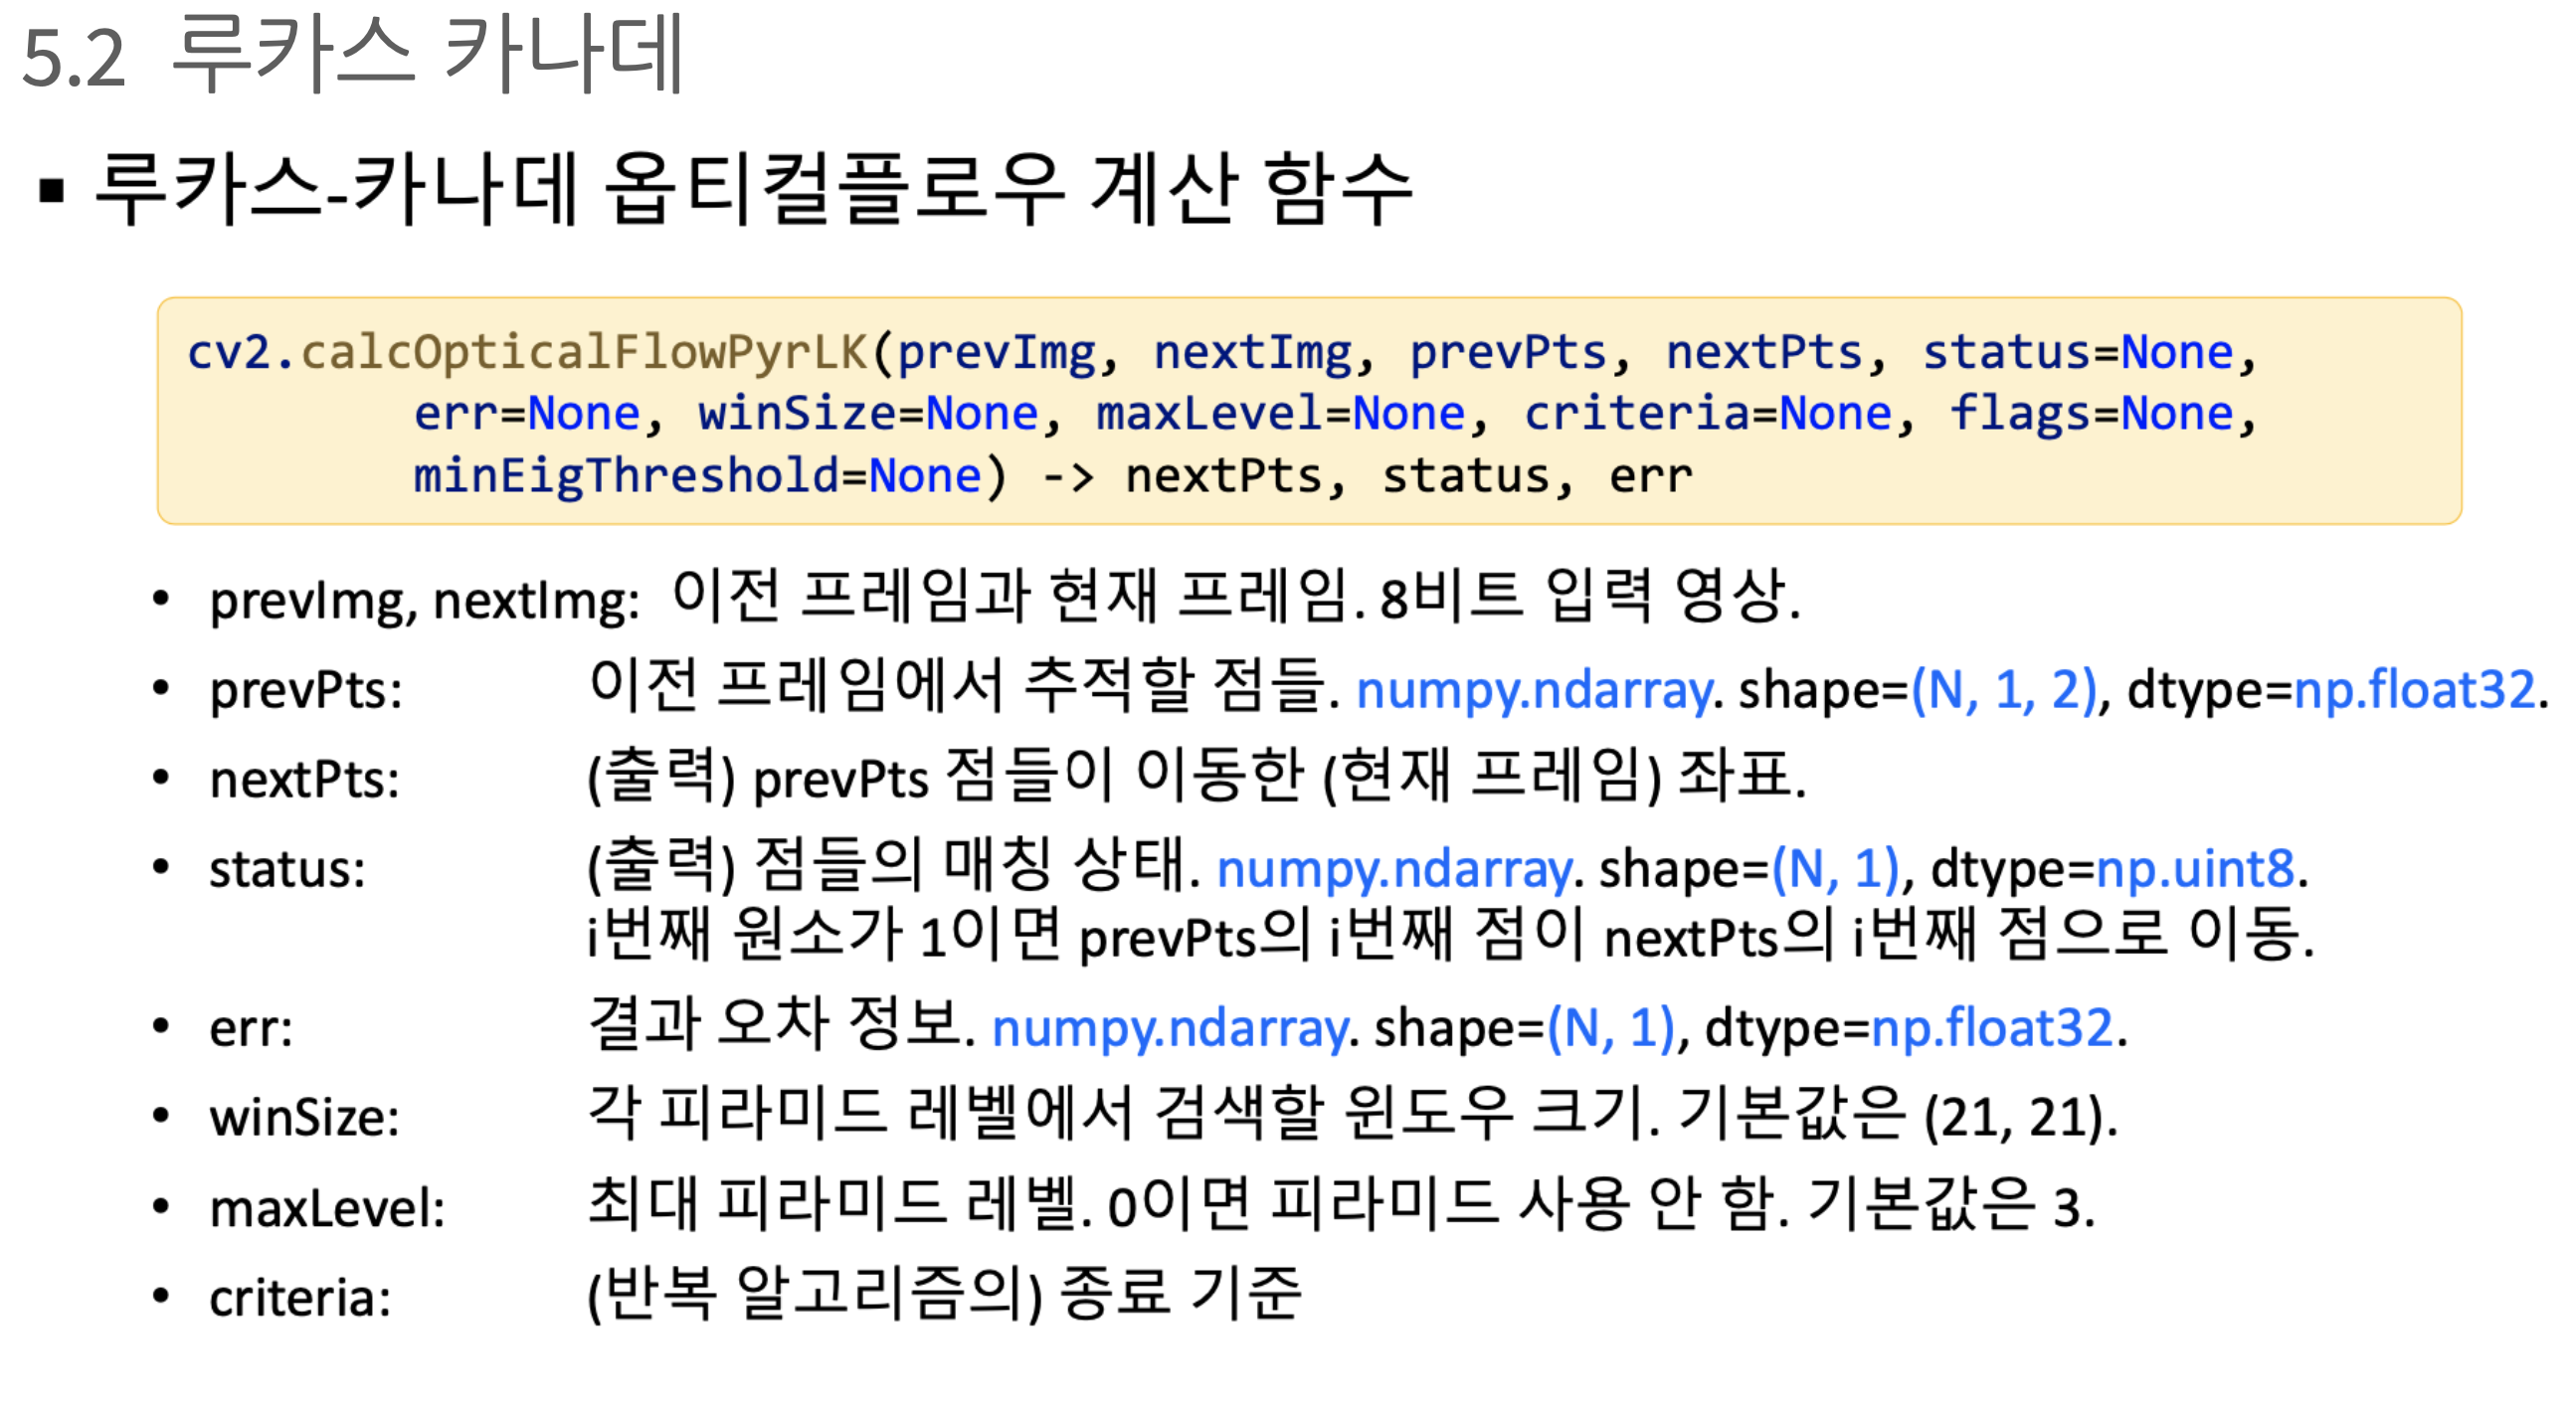

In [15]:
import sys
import numpy as np
import cv2
from PIL import Image

In [16]:
src1 = cv2.imread('/Users/jungjihoon/Library/Mobile Documents/com~apple~CloudDocs/00_DataScience/민형기/frame1.jpg')
src2 = cv2.imread('/Users/jungjihoon/Library/Mobile Documents/com~apple~CloudDocs/00_DataScience/민형기/frame2.jpg')

if src1 is None or src2 is None:
    print("image load failed")
    sys.exit()

In [10]:
# 1번 입력영상 그레이 스케일화
gray1 = cv2.cvtColor(src1, cv2.COLOR_BGR2GRAY)

pt1 = cv2.goodFeaturesToTrack(gray1, 50, 0.01, 10) # 코너검출 함수 : 입력영상, 코너최댓값, 코너 품질, 최소 거리
pt2, status, err = cv2.calcOpticalFlowPyrLK(src1, src2, pt1, None)

dst = cv2.addWeighted(src1, 0.5, src2, 0.5, 0)

In [36]:
for i in range(pt2.shape[0]):
    if status[i, 0] == 0:
        continue
        
    cv2.circle(dst, (tuple(map(int, pt1[i, 0]))), 4, (0, 255, 255), 2, cv2.LINE_AA)
    cv2.circle(dst, (tuple(map(int, pt2[i, 0]))), 4, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.arrowedLine(dst, (tuple(map(int, pt1[i, 0]))), (tuple(map(int, pt2[i, 0]))), (0, 255, 0), 2)

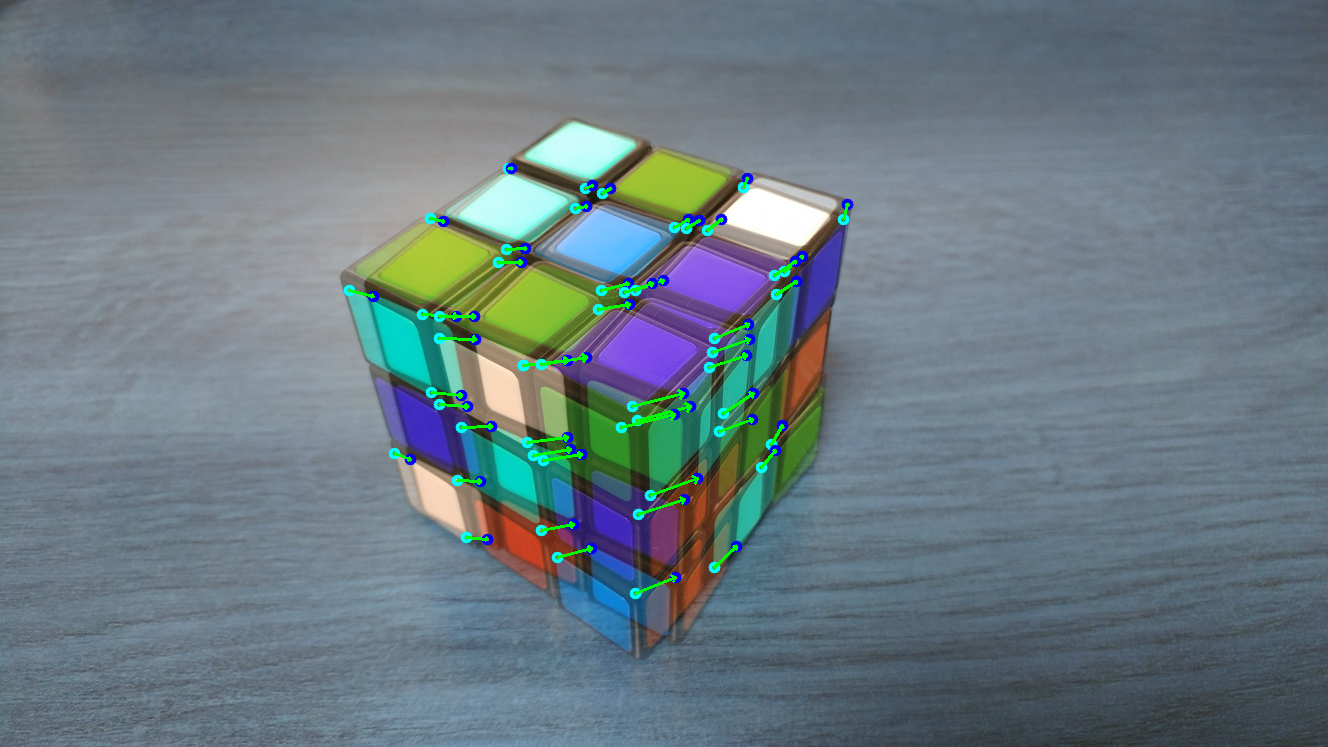

In [37]:
Image.fromarray(dst)